In [1]:
import os, json
import numpy as np

# walk = sorted(os.walk("."), key=lambda x: x[0])[::-1]
# for dirpath, dirnames, filenames in walk:
#     if "testingSetScores.json" in filenames:
#         data = json.load(open(os.path.join(dirpath, "testingSetScores.json"), "r"))
#         # sort data
#         data = dict(sorted(data.items(), key=lambda x: x[1]["ID"]))
#         deltas = []
#         for k in data:
#             initial_prompt_score = list(data[k]["initial_prompt"].values())[0]
#             optimized_prompt_score = list(data[k]["optimized_prompt"].values())[0]
#             delta = optimized_prompt_score - initial_prompt_score
#             deltas.append(delta)
            
#         print(deltas)
#         avg_change = sum(deltas) / len(deltas)
#         print(f"Avg change: {dirpath}: {avg_change}")
        
        
with open("testingSetScores.json", "r") as f:
    data = json.load(f)
    deltas = []
    for k in data:
        initial_prompt_score = list(data[k]["initial_prompt"].values())[0]
        optimized_prompt_score = list(data[k]["optimized_prompt"].values())[0]
        delta = optimized_prompt_score - initial_prompt_score
        deltas.append(delta)
        
    print(deltas)
    avg_change = np.mean(deltas)
    std = np.std(deltas)
    ci = 1.96 * std / np.sqrt(len(deltas))
    print(f"Avg change: {avg_change}")
    print(f"Std: {std}")
    print(f"95% CI: {ci}")
    
    # Plot the points on a vertical line with the confidence interval
    # import matplotlib.pyplot as plt
    # xs = np.zeros(len(deltas))
    # plt.figure()
    # plt.errorbar(xs, deltas, yerr=ci, fmt='o')
    # plt.show()

[6.020710258571615, 5.0080972222675655, 43.031596511523034, 45.030764566436424, 28.376651492448413, 15.949016058008883, 27.10641155799312, 69.046576651389, 28.347616704072294, 15.629125249714697, 11.612539408810736, 3.1415140315077394, 36.185662067807705, 26.89325083001659, 63.968300454899804, 7.364168087952848, 22.873321773671925, 1.3239125799238707, 13.0312144322135, 55.05025148031874, 4.034957800955581, 8.320329460215078, 12.233269829623481, 62.21324351570239, 65.3629145979391, 9.000936787585786, 64.8360101579758, 44.47261128803851, 23.69794233671624, 15.0505953882676, 67.68970119591737, 3.6565708018460725, 2.135125663075897, 13.458100216101762, 12.373182898698957, 26.021211573866957]
Avg change: 26.65409458144653
Std: 21.77102050359189
95% CI: 7.111866697840017


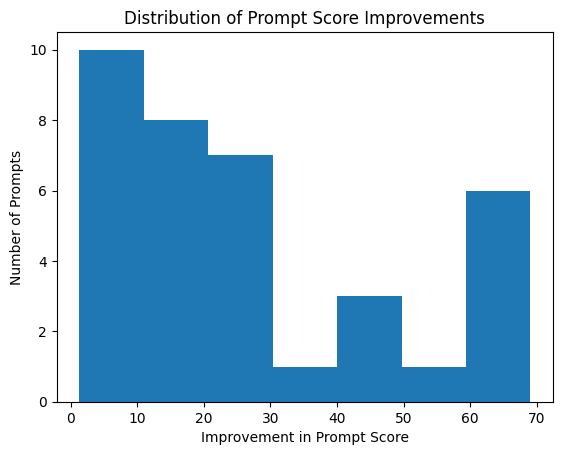

In [5]:
import matplotlib.pyplot as plt
plt.hist(deltas, bins=7)
plt.xlabel("Improvement in Prompt Score")
plt.ylabel("Number of Prompts")
plt.title("Distribution of Prompt Score Improvements")
plt.show()

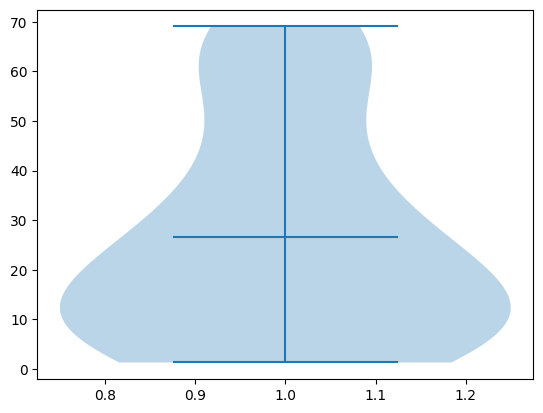

In [3]:
import matplotlib.pyplot as plt
plt.figure()
plt.violinplot(deltas, showmeans=True)
plt.show()